<a href="https://colab.research.google.com/github/visucs/100Day-of-ML/blob/main/Day24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing,
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [8]:
df = df.iloc[:,1:]

In [9]:
df.sample(5)

,Gender,Age,EstimatedSalary,Purchased
65,Male,24,58000,0
355,Male,60,34000,1
138,Female,28,59000,0
92,Male,26,15000,0
349,Male,38,61000,0


#Train test split

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased', axis = 1), df['Purchased'], test_size = 0.3, random_state = 0)
x_train.shape, x_test.shape

((280, 3), (120, 3))

#StandardScaler

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Apply one-hot encoding to the 'Gender' column
x_train_encoded = pd.get_dummies(x_train, columns=['Gender'], drop_first=True)
x_test_encoded = pd.get_dummies(x_test, columns=['Gender'], drop_first=True)

#fit the scaler to the train set, it will lean the parameters
scaler.fit(x_train_encoded)

#transform train and test sets
x_train_scaled = scaler.transform(x_train_encoded)
x_test_scaled = scaler.transform(x_test_encoded)

In [12]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04, 5.03571429e-01])

In [13]:
x_train

,Gender,Age,EstimatedSalary
92,Male,26,15000
223,Male,60,102000
234,Female,38,112000
232,Male,40,107000
377,Female,42,53000
...,...,...,...
323,Female,48,30000
192,Male,29,43000
117,Male,36,52000
47,Female,27,54000


In [14]:
x_train_scaled

array([[-1.1631724 , -1.5849703 ,  0.99288247],
       [ 2.17018137,  0.93098672,  0.99288247],
       [ 0.0133054 ,  1.22017719, -1.00716855],
       [ 0.20938504,  1.07558195,  0.99288247],
       [ 0.40546467, -0.48604654, -1.00716855],
       [-0.28081405, -0.31253226,  0.99288247],
       [ 0.99370357, -0.8330751 ,  0.99288247],
       [ 0.99370357,  1.8563962 , -1.00716855],
       [ 0.0133054 ,  1.24909623, -1.00716855],
       [-0.86905295,  2.26126285,  0.99288247],
       [-1.1631724 , -1.5849703 , -1.00716855],
       [ 2.17018137, -0.80415605,  0.99288247],
       [-1.35925203, -1.46929411,  0.99288247],
       [ 0.40546467,  2.2901819 ,  0.99288247],
       [ 0.79762394,  0.75747245, -1.00716855],
       [-0.96709276, -0.31253226,  0.99288247],
       [ 0.11134522,  0.75747245,  0.99288247],
       [-0.96709276,  0.55503912,  0.99288247],
       [ 0.30742485,  0.06341534,  0.99288247],
       [ 0.69958412, -1.26686079,  0.99288247],
       [-0.47689368, -0.0233418 , -1.007

In [15]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train_encoded.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test_encoded.columns)

In [16]:
np.round(x_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [17]:
np.round(x_train_scaled.describe(), 1)

,Age,EstimatedSalary,Gender_Male
count,280.0,280.0,280.0
mean,0.0,0.0,-0.0
std,1.0,1.0,1.0
min,-1.9,-1.6,-1.0
25%,-0.8,-0.8,-1.0
50%,-0.1,0.0,1.0
75%,0.8,0.5,1.0
max,2.2,2.3,1.0


#Effect of Scaling

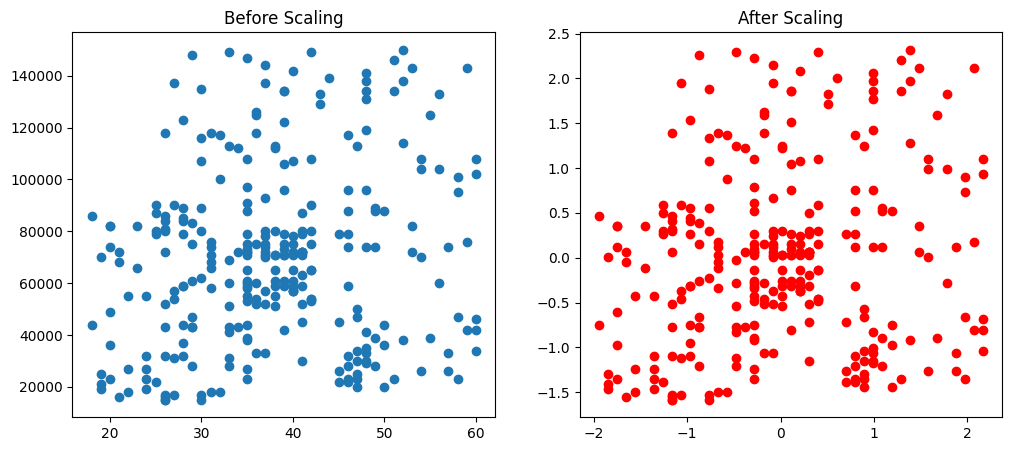

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))
ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After Scaling')
plt.show()

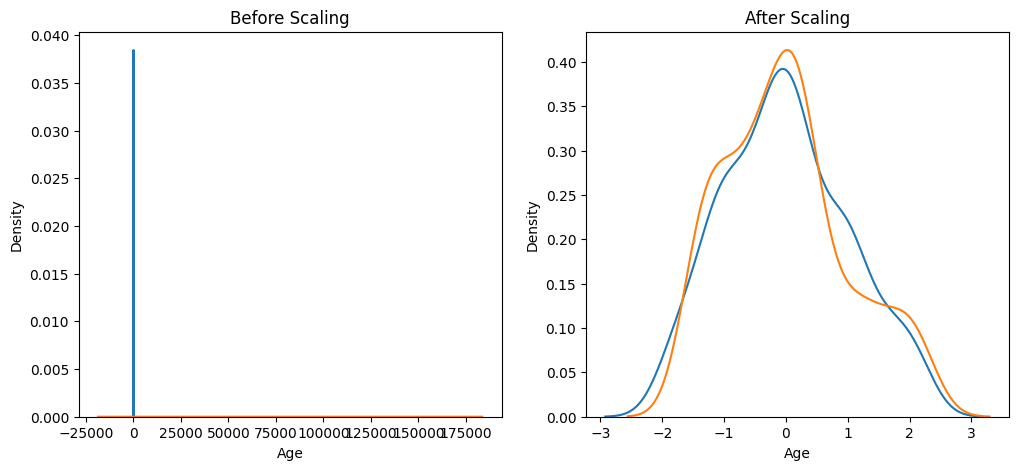

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()



#Comparison of Distributions

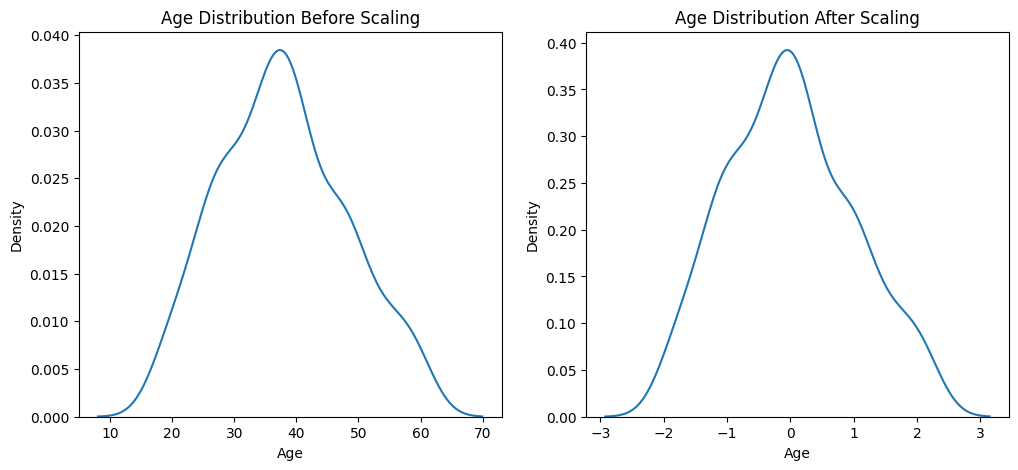

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

#before  scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
plt.show()

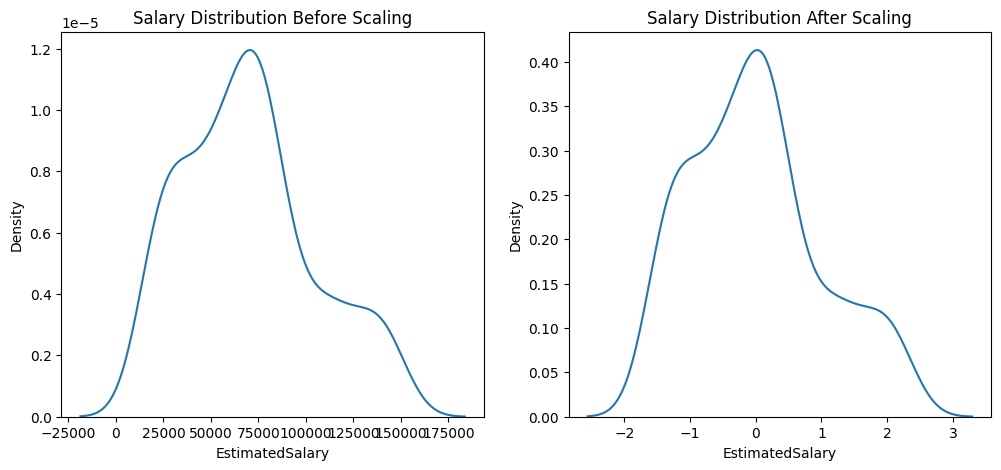

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

#before  scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution After Scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

#Why scaling is important

In [26]:
from sklearn.linear_model import LogisticRegression


In [27]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [29]:
lr.fit(x_train_encoded, y_train)
lr_scaled.fit(x_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_pred = lr.predict(x_test_encoded)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [34]:
from sklearn.metrics import accuracy_score

In [36]:
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.8916666666666667
Scaled 0.8916666666666667


In [38]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [41]:
dt.fit(x_train_encoded, y_train)
dt_scaled.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [42]:
y_pred = dt.predict(x_test_encoded)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [44]:
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.8833333333333333
Scaled 0.875


In [45]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


#Effect of Outlier

In [47]:
df = pd.concat([df, pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})],ignore_index=True)

In [48]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
398,Male,36,33000,0
399,Female,49,36000,1
400,NaN,5,1000,0
401,NaN,90,250000,1


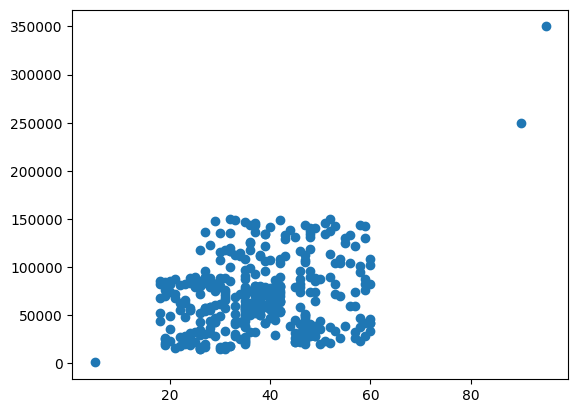

In [49]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 3), (121, 3))

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Apply one-hot encoding to the 'Gender' column
X_train_encoded = pd.get_dummies(X_train, columns=['Gender'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['Gender'], drop_first=True)

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train_encoded)

# transform train and test sets
X_train_scaled = scaler.transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [53]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

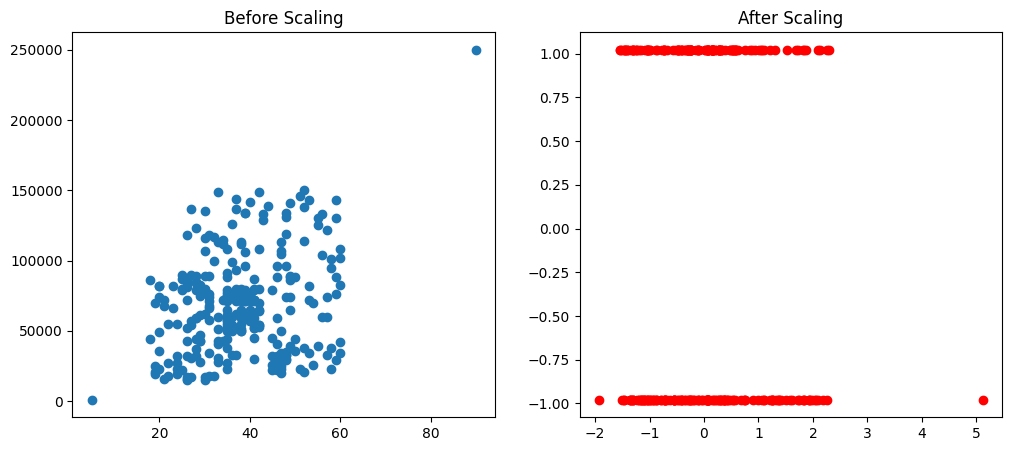

In [54]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()